# **Binary Classification Algorithm for Kaggle's Competition _Titanic: Machine Learning from Disaster_**

## **1. Intoduction**

### **1.1 About Titanic**
RMS Titanic was a British passenger liner operated by the White Star Line that sank in the North Atlantic Ocean in the early morning hours of 15 April 1912, after striking an iceberg during her maiden voyage from Southampton to New York City. Of the estimated 2,224 passengers and crew aboard, more than 1,500 died, making the sinking one of modern history's deadliest peacetime commercial marine disasters. RMS Titanic was the largest ship afloat at the time she entered service and was the second of three Olympic-class ocean liners operated by the White Star Line. She was built by the Harland and Wolff shipyard in Belfast.

More info at: https://en.wikipedia.org/wiki/Titanic

### **1.2 About the competition the algorithm**

The challange consist on using as input the Titanic passenger data and try to predict who will survive and who will die. This one doesn't reward any prizes, it just improve the knowledge about Kaggle's competitions.

## **2. Setting up the data**

### **2.1 Module imports**

In [1]:
cd /content/drive/My Drive/Colab Notebooks

/content/drive/My Drive/Colab Notebooks


In [2]:
import numpy as np # Linear algebra
import pandas as pd # Data processing
import matplotlib.pyplot as plt # Plotting grafics about the data and results
import seaborn as sns # # Plotting grafics about the data and results

import os # Access operational system properties
for dirname, _, filenames  in os.walk('Titanic-Kaggle-Competition/input/titanic'):
  for filename in filenames:
    print(os.path.join(dirname, filename))

import warnings # Removing warnings on the notebook
warnings.filterwarnings('ignore')

Titanic-Kaggle-Competition/input/titanic/gender_submission.csv
Titanic-Kaggle-Competition/input/titanic/test.csv
Titanic-Kaggle-Competition/input/titanic/train.csv


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### **2.2 Reading the datasets**

Train data:

In [3]:
train_data = pd.read_csv("Titanic-Kaggle-Competition/input/titanic/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Test data:

In [5]:
test_data = pd.read_csv("Titanic-Kaggle-Competition/input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


### **2.3 Cleaning train and test data**

In [7]:
# Labels set
train_labels = train_data.Survived
train_data = train_data.drop(["Survived"], axis=1)
# Replacing Sex, Embarked, Ticket and Cabin column to number values
def replace_Sex_Ticket_Cabin_Embarked(df):
  df.Sex = df.Sex.replace(['male', 'female'], [0, 1])
  df.Embarked = df.Embarked.replace(['S', 'C', 'Q'], [0, 1, 2])
  df.Cabin = df.Cabin.replace(
      df.Cabin.unique(), 
      range(len(df.Cabin.unique())))
  df.Ticket = df.Ticket.replace(
      df.Ticket.unique(),
      range(len(df.Ticket.unique())))

replace_Sex_Ticket_Cabin_Embarked(train_data)
replace_Sex_Ticket_Cabin_Embarked(test_data)

# Removing Name column
train_data = train_data.drop(["Name"], axis=1)
test_data = test_data.drop(["Name"], axis=1)

# Normalizing the different ranges 
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)
train_data -= mean
train_data /= std

test_data -= mean
test_data /= std  



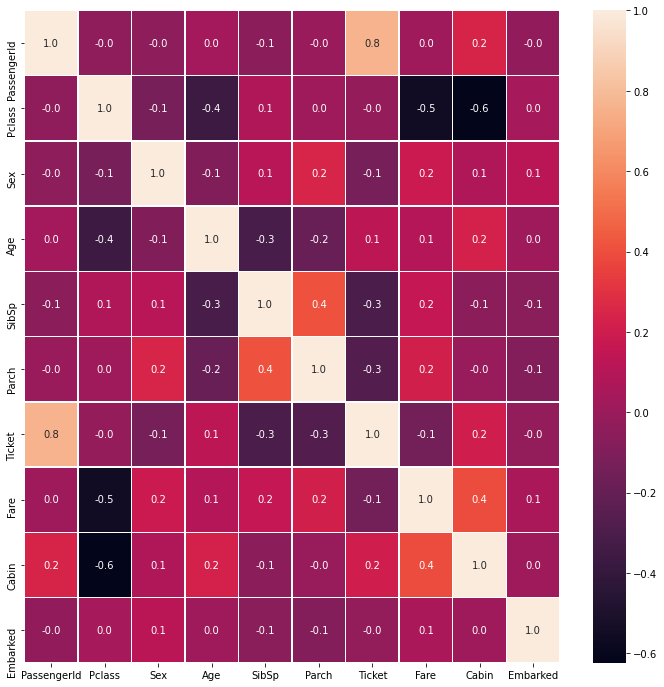

In [8]:
# Analyzing the correlation with Survived column
corr = train_data.corr()
plt.figure(figsize=(12, 12))
sns.heatmap(
    corr,
    annot=True,
    linewidths=.5,
    fmt='.1f'
)

## **3. Binary classification model**

### **3.1 Building the model**

In [12]:
# Building the model as a function to use with k-fold validation
def build_model():
  from keras import models
  from keras import layers

  model = models.Sequential()
  model.add(layers.Dense(10, activation='relu'))
  model.add(layers.Dense(10, activation='relu'))
  model.add(layers.Dense(1, activation='sigmoid'))

  model.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])
  return model

### **3.2 Training with _k-fold_ validation**

In [16]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

for i in range(k):
  print(f"Processing the {i+1}° fold")

  # Separating validation set from training set

  ## Validation set:
  val_data = train_data[i * num_val_samples: (i+1) * num_val_samples]
  val_labels = train_labels[i * num_val_samples: (i+1) * num_val_samples]

  ## Training set:
  partial_train_data = np.concatenate(
      [train_data[: i * num_val_samples],
       train_data[(i+1) * num_val_samples:]],
      axis=0)
  partial_train_labels = np.concatenate(
      [train_labels[: i * num_val_samples],
       train_labels[(i+1) * num_val_samples:]],
      axis=0)

  # Calling and training the model
  model = build_model()
  model_train = model.fit(
      partial_train_data,
      partial_train_labels,
      validation_data = (val_data, val_labels),
      epochs = num_epochs,
      batch_size = 819)
  history = model_train.history

Processing the 1° fold
Epoch 1/100
1/1 [==============================] - 0s 143ms/step - loss: nan - accuracy: 0.4335 - val_loss: nan - val_accuracy: 0.6486
Epoch 2/100
1/1 [==============================] - 0s 16ms/step - loss: nan - accuracy: 0.6054 - val_loss: nan - val_accuracy: 0.6486
Epoch 3/100
1/1 [==============================] - 0s 18ms/step - loss: nan - accuracy: 0.6054 - val_loss: nan - val_accuracy: 0.6486
Epoch 4/100
1/1 [==============================] - 0s 18ms/step - loss: nan - accuracy: 0.6054 - val_loss: nan - val_accuracy: 0.6486
Epoch 5/100
1/1 [==============================] - 0s 19ms/step - loss: nan - accuracy: 0.6054 - val_loss: nan - val_accuracy: 0.6486
Epoch 6/100
1/1 [==============================] - 0s 20ms/step - loss: nan - accuracy: 0.6054 - val_loss: nan - val_accuracy: 0.6486
Epoch 7/100
1/1 [==============================] - 0s 18ms/step - loss: nan - accuracy: 0.6054 - val_loss: nan - val_accuracy: 0.6486
Epoch 8/100
1/1 [=====================

Plotting "Training and validation loss" and "Training and validation accuracy"

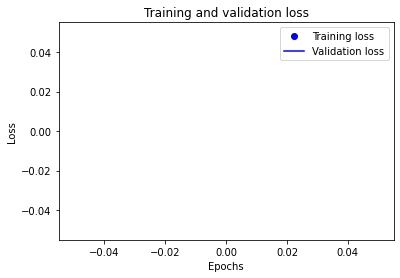

In [14]:
loss_values = history['loss']
val_loss_values = history['val_loss']
acc = history['accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [15]:
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

NameError: ignored

<Figure size 432x288 with 0 Axes>